# **EDA[Exploratory Data Analysis]**

**STEP 1**

Importing the libraries

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import plotly.express as px

**STEP 2**

Import the data

In [83]:
df = pd.read_csv('./TeslaInc. ( TSLA ).csv')

In [84]:
data_df=df

**STEP 3**

Dimensions of the data

In [85]:
print("Dimensions of the data")
df.shape

Dimensions of the data


(3077, 7)

**STEP 4**

Information about the data

In [86]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [87]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
1,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
3,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
4,2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500


In [88]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3072,2022-09-13,292.899994,297.399994,290.399994,292.130005,292.130005,68229600
3073,2022-09-14,292.239990,306.000000,291.640015,302.609985,302.609985,72628700
3074,2022-09-15,301.829987,309.119995,300.720001,303.750000,303.750000,64795500
3075,2022-09-16,299.609985,303.709991,295.600006,303.350006,303.350006,86949500
3076,2022-09-19,300.089996,309.839996,297.799988,309.070007,309.070007,60060200


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3077 entries, 0 to 3076
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3077 non-null   object 
 1   Open       3077 non-null   float64
 2   High       3077 non-null   float64
 3   Low        3077 non-null   float64
 4   Close      3077 non-null   float64
 5   Adj Close  3077 non-null   float64
 6   Volume     3077 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 168.4+ KB


**STEP 5**

About the Dataset

In [90]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3077.0,5.550217e+01,9.391308e+01,1.076000e+00,8.192667e+00,1.598333e+01,2.358667e+01,4.114700e+02
High,3077.0,5.674805e+01,9.608503e+01,1.108667e+00,8.354667e+00,1.624200e+01,2.391667e+01,4.144967e+02
Low,3077.0,5.416118e+01,9.151722e+01,9.986670e-01,7.970667e+00,1.568733e+01,2.322933e+01,4.056667e+02
Close,3077.0,5.549554e+01,9.385135e+01,1.053333e+00,8.113333e+00,1.600067e+01,2.352333e+01,4.099700e+02
Adj Close,3077.0,5.549554e+01,9.385135e+01,1.053333e+00,8.113333e+00,1.600067e+01,2.352333e+01,4.099700e+02
Volume,3077.0,9.340392e+07,8.235816e+07,1.777500e+06,4.144350e+07,7.541550e+07,1.173030e+08,9.140820e+08


**STEP 6**

Duplicate and Missing values

In [91]:
df.duplicated().sum()

0

No duplicate values

In [92]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

No NA / Null values

In [93]:
df.isnull().sum().sum()

0

In [94]:
df=df.dropna()
print("Dimension of the data after dropping the null values")
df.shape

Dimension of the data after dropping the null values


(3077, 7)

since no Null & missing values the dimensions will be same as the initial data

**STEP 7**

Set the default index as data

In [95]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500


**STEP 8**

line plot

In [96]:
fig = px.line(x=df.index,y=df['Adj Close'])
fig.show()

In [97]:
df.index.min()

Timestamp('2010-06-30 00:00:00')

In [98]:
df.index.max()

Timestamp('2022-09-19 00:00:00')

Line plot of actual values and moving averages curve

<BarContainer object of 3077 artists>

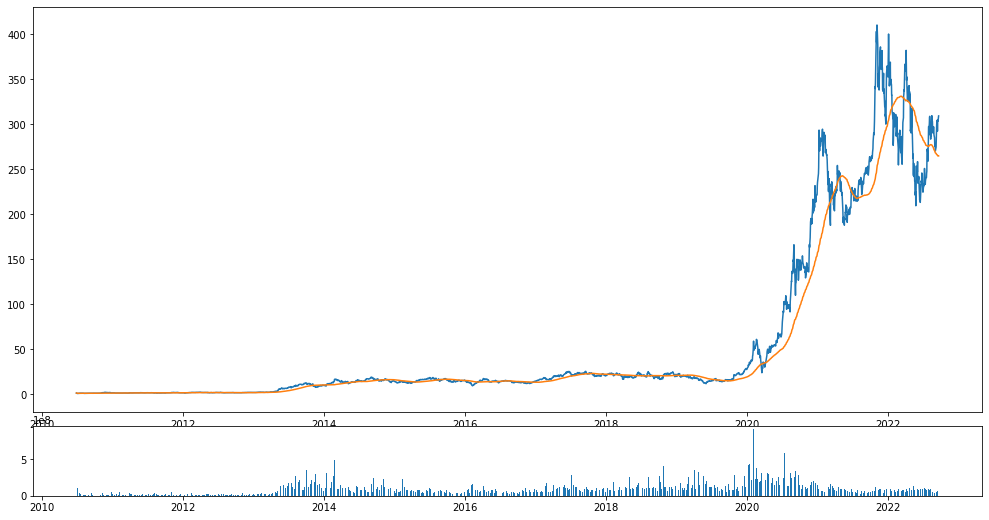

In [99]:
df_copy = df.copy()
df_copy['100ma'] = df['Adj Close'].rolling(window=100,min_periods=0).mean() # moving average of 100 days
plt.figure(figsize=(17,9))
ax1=plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2=plt.subplot2grid((6,1),(5,0),rowspan=10,colspan=1,sharex=ax1)
ax1.plot(df.index,df['Adj Close'])
ax1.plot(df_copy.index,df_copy['100ma'])
ax2.bar(df.index,df['Volume'])

In [100]:
dataset = df.filter(['Adj Close'])
data = dataset.values
data = data.reshape(-1,1)
print(data[0:10])
print(f"min value: {min(data)}")
print(f"max value: {max(data)}")

[[1.588667]
 [1.464   ]
 [1.28    ]
 [1.074   ]
 [1.053333]
 [1.164   ]
 [1.16    ]
 [1.136667]
 [1.209333]
 [1.322667]]
min value: [1.053333]
max value: [409.970001]


since the dataset containes the values of different range we need to normilize it so that it will workl efficiently

It is a continues data set of stock price of tesla company so there won't be any outliers we can directly proceed to pre processing of data

**STEP 9**

Normalising of the data

In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [102]:
# normalize the dataset
data = scaler.fit_transform(data)
print(data[0:10])
print(f"min value: {min(data)}")
print(f"max value: {max(data)}")
# split into train and test set
train_set = int(len(data)*0.8)
test_set = train_set - len(data)

train, test = data[0:train_set,:], data[train_set:len(data),:]

[[1.30915182e-03]
 [1.00428041e-03]
 [5.54310983e-04]
 [5.05408598e-05]
 [0.00000000e+00]
 [2.70634603e-04]
 [2.60852659e-04]
 [2.03792133e-04]
 [3.81495821e-04]
 [6.58652535e-04]]
min value: [0.]
max value: [1.]


After normalizing the data will be in the range of zero to one
The train and test data was splitted based on 80:20 rule 80% of the data we will take for training and 20% of the data for validation

In [103]:
print(train.shape)
train[0:10]

(2461, 1)


array([[1.30915182e-03],
       [1.00428041e-03],
       [5.54310983e-04],
       [5.05408598e-05],
       [0.00000000e+00],
       [2.70634603e-04],
       [2.60852659e-04],
       [2.03792133e-04],
       [3.81495821e-04],
       [6.58652535e-04]])

In [104]:
print(test.shape)
test[0:10]

(616, 1)


array([[0.09084166],
       [0.10355003],
       [0.11315916],
       [0.11641003],
       [0.11891747],
       [0.12033259],
       [0.11910495],
       [0.1093817 ],
       [0.11678174],
       [0.11246464]])

**STEP 10**

Univariate analysis

In [105]:
# split a univariate sequence into samples
def create_dataset(dataset, predictiontime):
    dataX, dataY = [],[]
    for i in range(predictiontime,dataset.shape[0]):
        dataX.append(dataset[i - predictiontime : i, 0])
        dataY.append(dataset[i, 0])
    return np.array(dataX), np.array(dataY)


In [106]:
x_train, y_train = create_dataset(train, 60)
x_test, y_test = create_dataset(test,60)
# reshape x_train and x_test to 3d matrix sample,timestamp,feature
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [107]:
x_train.shape

(2401, 60, 1)

In [108]:
x_test.shape

(556, 60, 1)

In [109]:
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [110]:
model.fit(x_train,y_train,epochs=5, batch_size=32)

test_predict = model.predict(x_test)

Epoch 1/5
76/76 [==============================] - 28s 252ms/step - loss: 1.1864e-04
Epoch 2/5
76/76 [==============================] - 18s 241ms/step - loss: 3.8402e-05
Epoch 3/5
76/76 [==============================] - 18s 243ms/step - loss: 4.3625e-05
Epoch 4/5
76/76 [==============================] - 18s 233ms/step - loss: 3.4215e-05
Epoch 5/5
76/76 [==============================] - 18s 242ms/step - loss: 4.2331e-05


In [111]:
test_predict = scaler.inverse_transform(test_predict)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1,1))

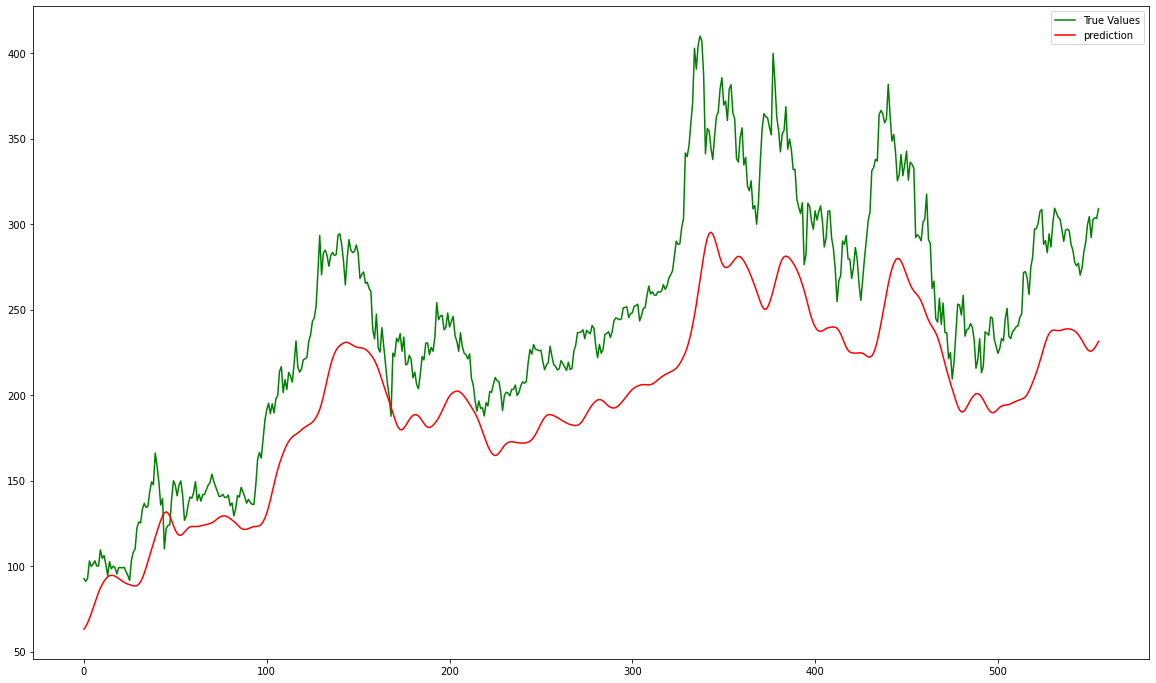

In [115]:
fig, ax = plt.subplots(figsize=(20,12))

ax.plot(y_test_scaled, color='green', label='True Values')
plt.plot(test_predict, color='red',label='prediction')
plt.legend()
plt.show()

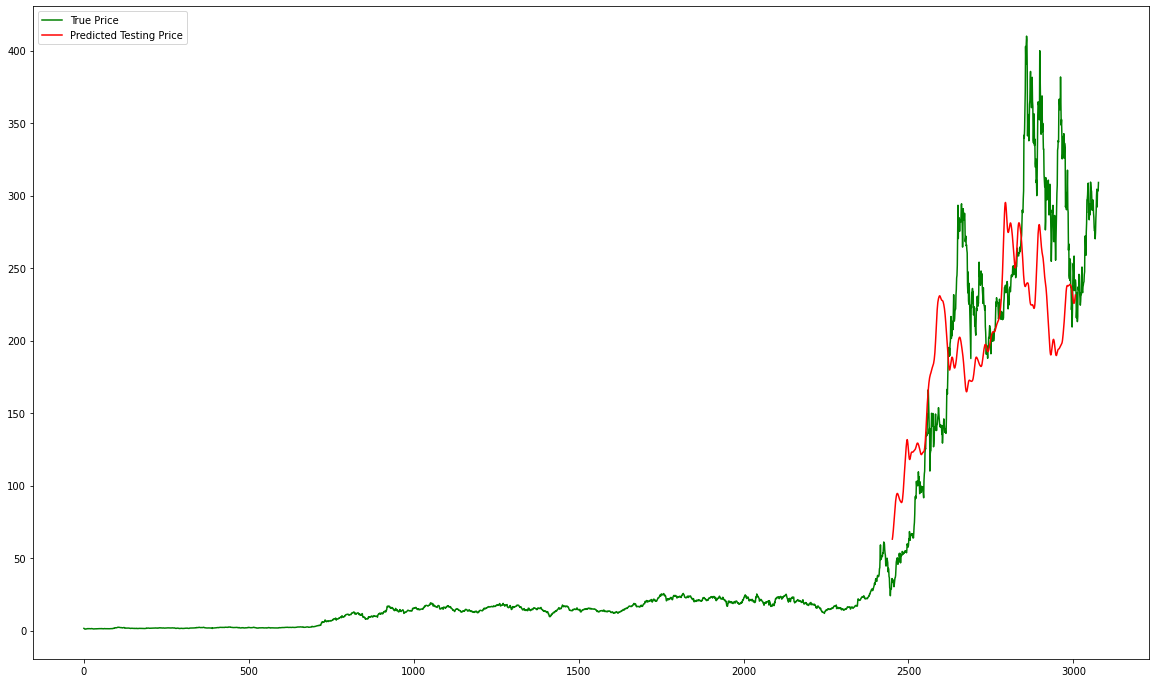

In [113]:
fig, ax2 = plt.subplots(figsize=(20, 12))
plt.plot(df['Adj Close'].values, color="green", label="True Price")
ax2.plot(range(len(y_train) + 50, len(y_train) + 50 + len(test_predict)), test_predict, color="red",
             label='Predicted Testing Price')
plt.legend()

# **AUTOMATIC EDA**

In [114]:
from pandas_profiling import ProfileReport 
#EDA using pandas-profiling 
profile = ProfileReport(data_df, explorative=True) 
#Saving results to a HTML file 
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]